In [2]:
import pandas as pd
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import shutil

# Ignore all warnings
warnings.filterwarnings("ignore")

%matplotlib inline

plt.style.use("fivethirtyeight")

In [3]:
#Loading Training Dataset and Test Dataset
train_data = pd.read_csv("Dataset/train.csv")
test_data  = pd.read_csv("Dataset/test.csv")
train_data.head()
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
train_data = train_data.set_index('Id')
test_data = test_data.set_index('Id')

In [6]:
print(f"train data shape: {train_data.shape}")

print(f"test  data shape: {test_data.shape}")

train data shape: (1460, 80)
test  data shape: (1459, 79)


In [7]:
target = [col for col in train_data.columns if col not in test_data.columns][0]
print("The target variable is",target )

The target variable is SalePrice


In [8]:
print("Training Data Description")
display(train_data.describe())
print(f"\n{'_' * shutil.get_terminal_size().columns}\n") 
print("Testing Data Description")
display(test_data.describe())

Training Data Description


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000



________________________________________________________________________________

Testing Data Description


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [9]:
# All categorical nomial variables
cat_nom = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2',
           'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
           'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'Functional',
           'GarageType', 'GarageFinish', 'MoSold', 'PavedDrive', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

# All categorical ordinal variables
cat_ord = ['Utilities', 'LotShape', 'LandContour', 'LandSlope', 'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond',
           'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC']
# All numerical continous variables
num_con = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
           '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
           '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']

# All numerical discrete variables
num_dis = ['YearBuilt', 'YearRemodAdd', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
           'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'YrSold']

# All numeric and categorical columns
numeric_columns = num_con + num_dis
categorical_columns  = cat_ord + cat_nom


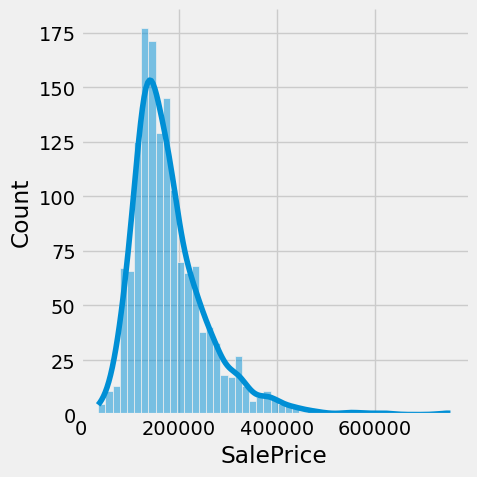

In [10]:
sns.displot(x=train_data['SalePrice'], kde=True)
plt.show()

In [11]:
train_data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [12]:
print("Skewness",train_data['SalePrice'].skew())
print("Kurtosis",train_data['SalePrice'].kurt())

Skewness 1.8828757597682129
Kurtosis 6.536281860064529


In [13]:
def visualise_data(data, list_cols, plot_type, display_corr_score=False, **kwargs):

    if plot_type not in  ["scatterplot", "histplot", "countplot"]:
        print(f"Invalid plot_type specified: Can only show [scatterplot, histplot, countplot]")
        return

    num_plots = len(list_cols)
    num_cols = 4
    num_rows = -(-num_plots // num_cols) # Using negative signs here ensures that total rows are enough to accomodate all plots

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4*num_rows), **kwargs)

    # Loop through the list of columns (plots) and enumerate them along with their index (idx).
    for idx, column in enumerate(list_cols):
        row = idx // num_cols
        col = idx % num_cols
        ax = axes[row, col]
        
        if plot_type == "scatterplot":
            sns.scatterplot(x=data[column], y=data['SalePrice'], ax=ax)
            ax.set_ylabel(target, fontsize=14)
            ax.set_xlabel(column, fontsize=14)
            if display_corr_score == True:
                correlation = data[column].corr(data['SalePrice'])

                # Display the correlation score as text on the plot at a specific position.
                ax.text(.8, .9, f'corr: {correlation:.2f}', transform=ax.transAxes, fontsize=12, ha='center')

        elif plot_type == "histplot":
            sns.histplot(x=data[column], ax=ax)
            ax.set_xlabel(column, fontsize=14)
            ax.set_ylabel(" ")

        elif plot_type == "countplot":
            sns.countplot(x=data[column], ax=ax)

            # Rotate and align the x-axis tick labels for better readability.
            ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

            # set ylabel to emoty string
            ax.set_ylabel(" ")
            ax.set_xlabel(column, fontsize=14)
    for idx in range(num_plots, num_rows * num_cols):

        # Remove the subplot (axis) at the current index from the figure (fig).
        fig.delaxes(axes.flatten()[idx])

    # Set the figure title based on plot type
    if plot_type == "scatterplot":
        fig.suptitle(f"Scatterplot of Continuous Numerical features With {target}", fontsize=16)

    elif plot_type == "histplot":
        fig.suptitle("Histograms of Numerical Discrete features", fontsize=16)

    elif plot_type == "countplot":
        fig.suptitle("Countplot of Categorical features", fontsize=16)

    plt.subplots_adjust(hspace=0.5)
    plt.show()     
            

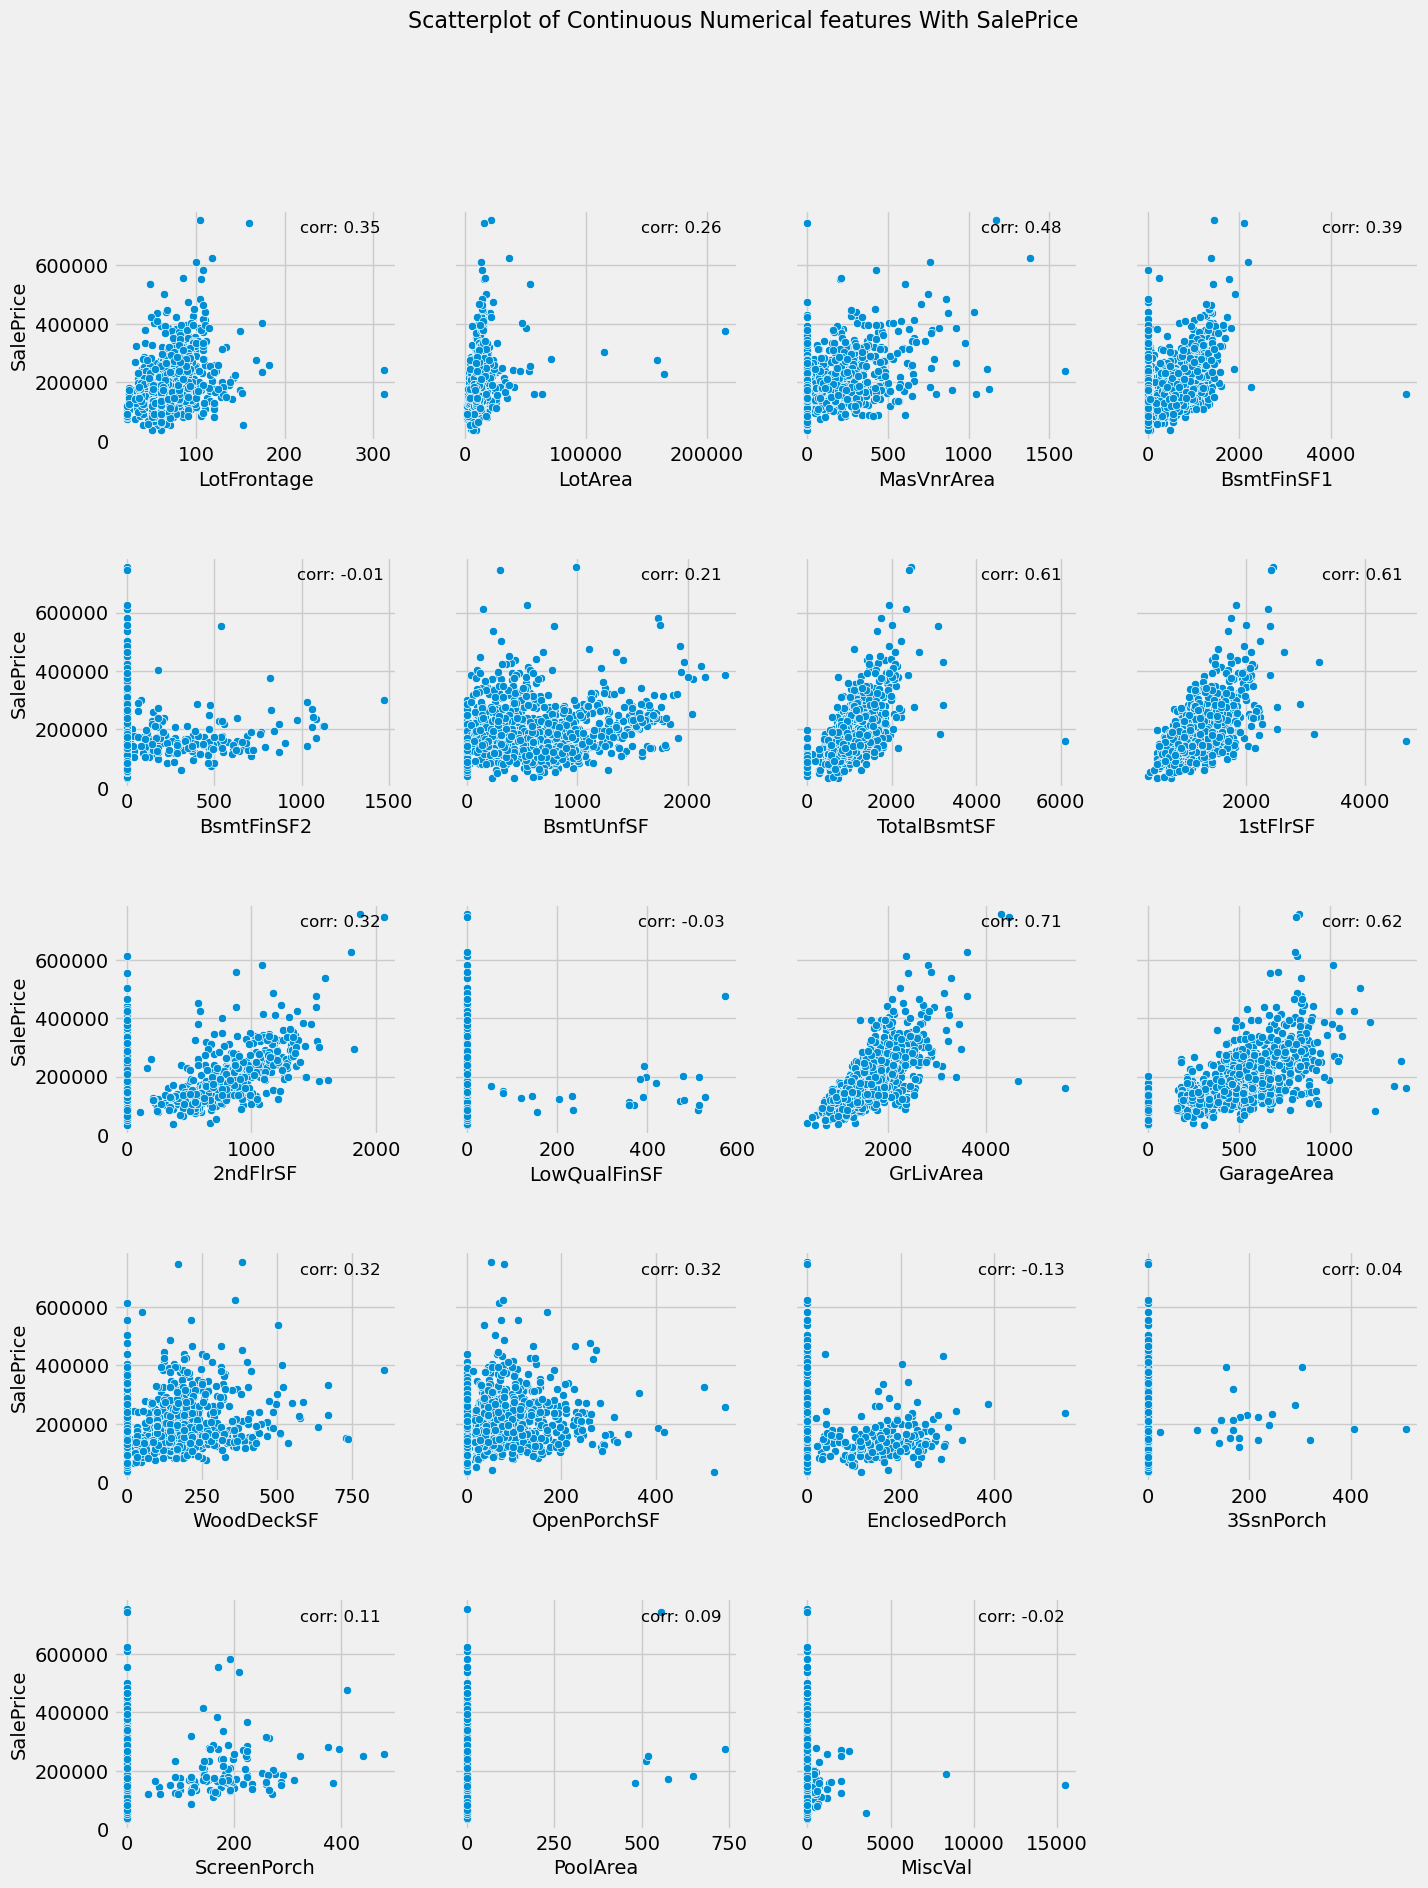

In [14]:
visualise_data(train_data, num_con, 'scatterplot', display_corr_score=True, sharey=True)

In [15]:
def remove_outliers(data,col,cut_off):
    return data[(data[col].isnull()) | (data[col] < cut_off)]

In [16]:
print(f"Train Data Shape before removing outliers {train_data.shape}")
train_data = remove_outliers(train_data,'LotFrontage',170)
train_data = remove_outliers(train_data,'LotArea',100000)
train_data = remove_outliers(train_data, 'MasVnrArea',1000)
train_data = remove_outliers(train_data,'BsmtFinSF1',2000)
train_data = remove_outliers(train_data,'BsmtFinSF2',1200)
train_data = remove_outliers(train_data,'TotalBsmtSF',3000)
train_data = remove_outliers(train_data,'1stFlrSF',2600)
train_data = remove_outliers(train_data,'GrLivArea',4000)
train_data = remove_outliers(train_data,'GarageArea',1200)
train_data = remove_outliers(train_data,'WoodDeckSF',500)
train_data = remove_outliers(train_data,'OpenPorchSF',400)
train_data = remove_outliers(train_data,'EnclosedPorch',380)

print(f"Train Data Shape after removing outliers:{train_data.shape}")

Train Data Shape before removing outliers (1460, 80)
Train Data Shape after removing outliers:(1410, 80)


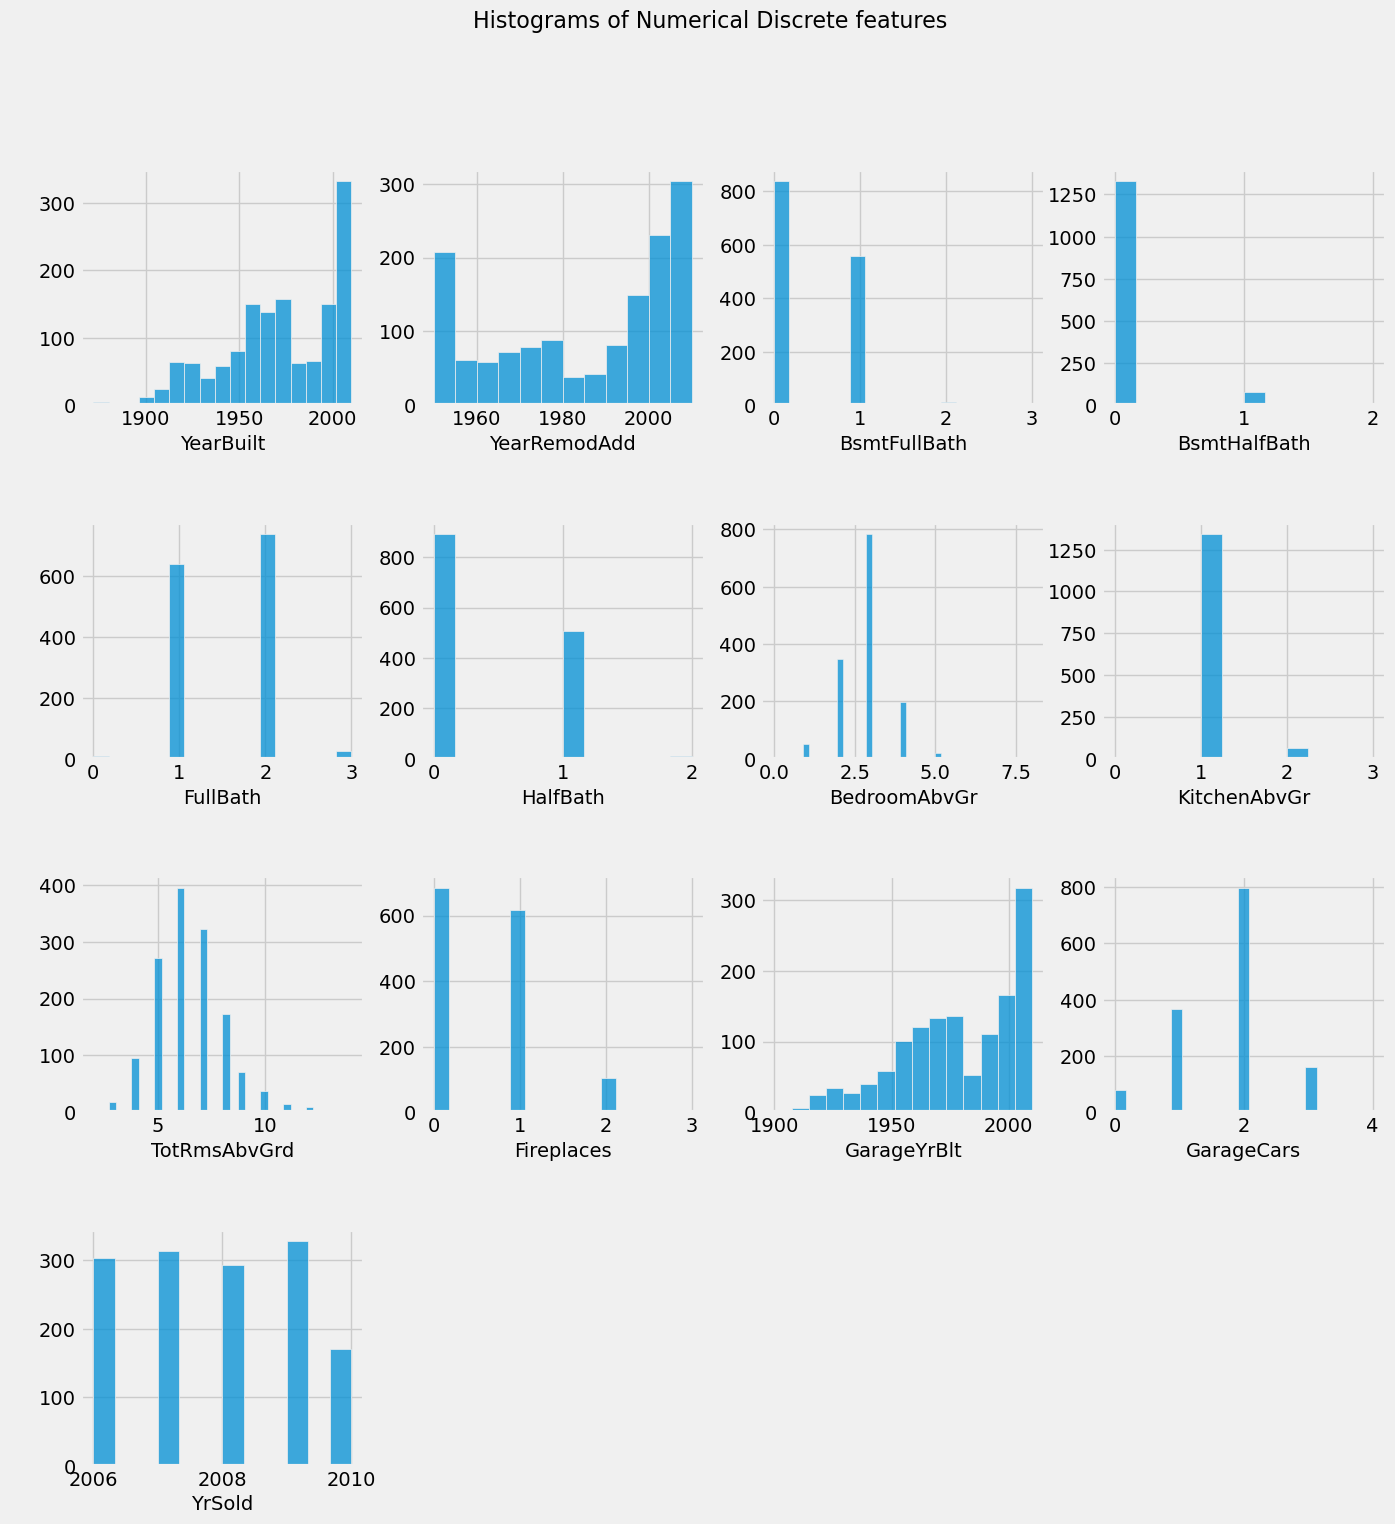

In [17]:
visualise_data(train_data,num_dis,"histplot")

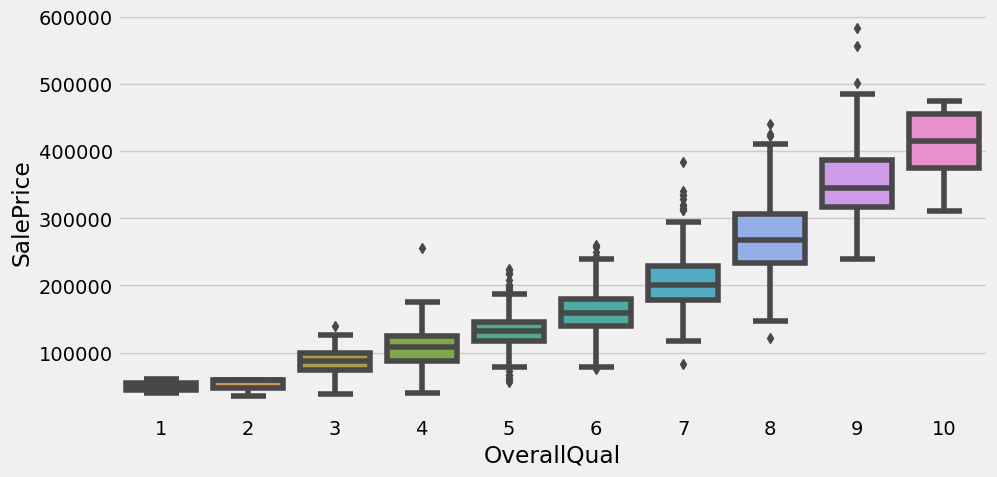

In [18]:
plt.figure(figsize=(10,5))
sns.boxplot(data=train_data,x="OverallQual",y="SalePrice")
plt.show()

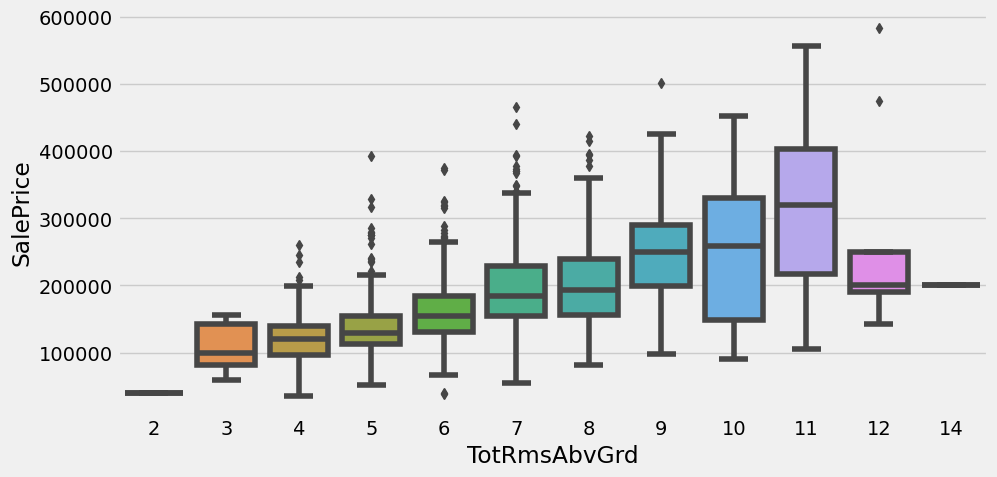

In [19]:
plt.figure(figsize=(10,5))
sns.boxplot(data=train_data,x="TotRmsAbvGrd",y="SalePrice")
plt.show()

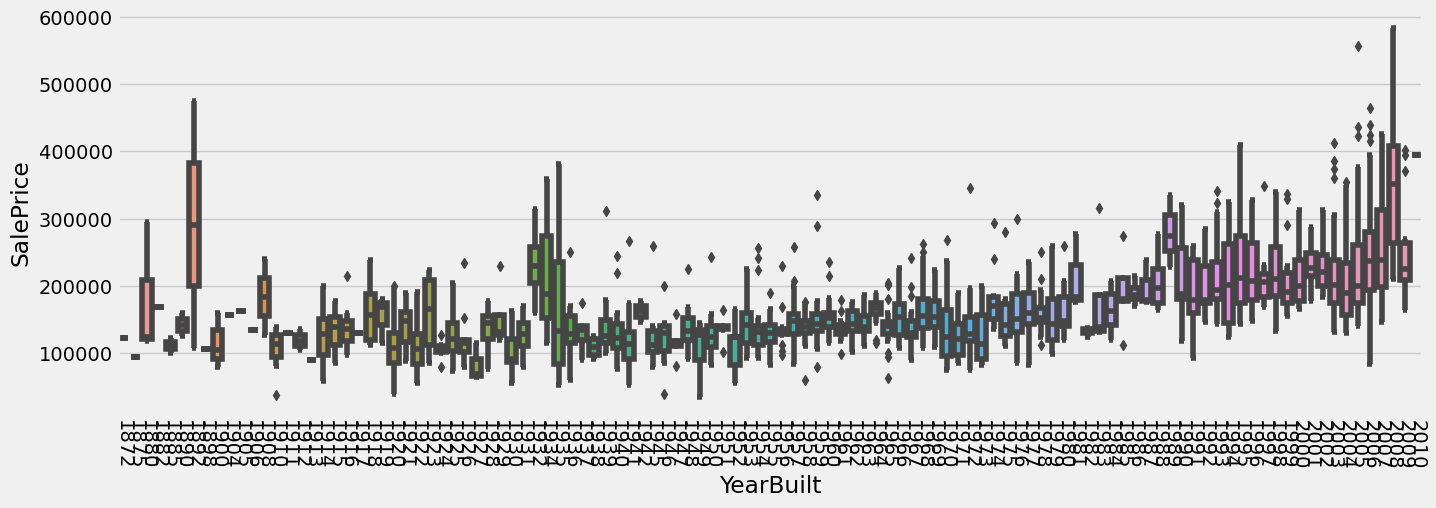

In [20]:
plt.figure(figsize=(15,5))
sns.boxplot(data=train_data, x="YearBuilt", y="SalePrice")
plt.xticks(rotation=270)
plt.show()

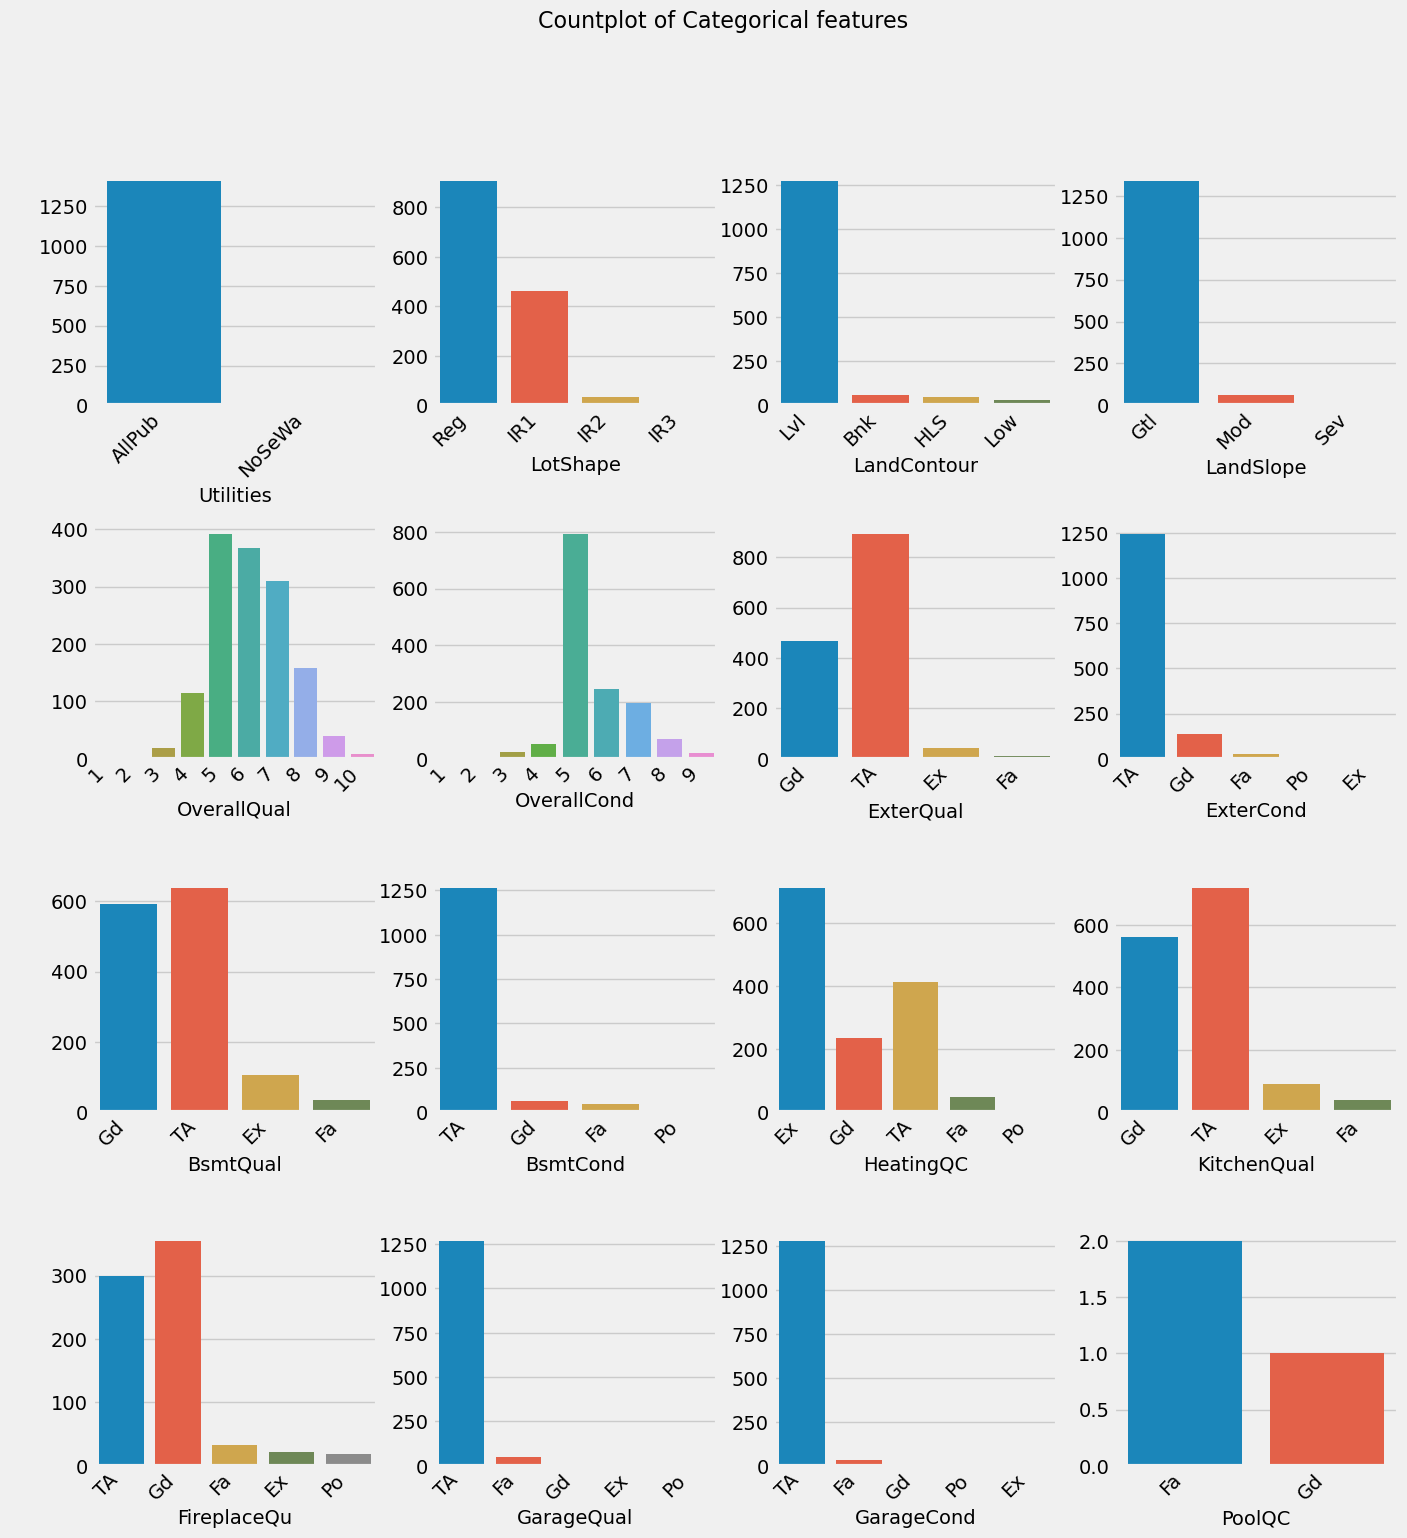

In [21]:
visualise_data(train_data,cat_ord,"countplot")

In [22]:
train_data[['MSSubClass','OverallQual','OverallCond','MoSold']] = train_data[['MSSubClass','OverallQual','OverallCond','MoSold']].astype('str')
test_data[['MSSubClass','OverallQual','OverallCond','MoSold']] = test_data[['MSSubClass','OverallQual','OverallCond','MoSold']].astype('str')

In [23]:
print(f"In train Data:\n\n{train_data[['MSSubClass','OverallQual','OverallCond','MoSold']].dtypes}")
print(f"In test Data:\n\n{test_data[['MSSubClass','OverallQual','OverallCond','MoSold']].dtypes}")

In train Data:

MSSubClass     object
OverallQual    object
OverallCond    object
MoSold         object
dtype: object
In test Data:

MSSubClass     object
OverallQual    object
OverallCond    object
MoSold         object
dtype: object


In [24]:
cat_ord_map1 = {'AllPub': 4, 'NoSewr': 3, 'NoSeWa': 2, 'ELO': 1}
cat_ord_map2 = {'Reg': 4, 'IR1': 3, 'IR2': 2, 'IR3': 1}
cat_ord_map3 = {'Lvl': 4, 'Bnk': 3, 'HLS': 2, 'Low': 1}
cat_ord_map4 = {'Gtl': 3, 'Mod': 2, 'Sev': 1}
cat_ord_map5 = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}
cat_ord_map6 = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}
cat_ord_map7 = {'1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '10': 10}
cat_ord_map8 = {'1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9}
cat_ord_map9 = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2}


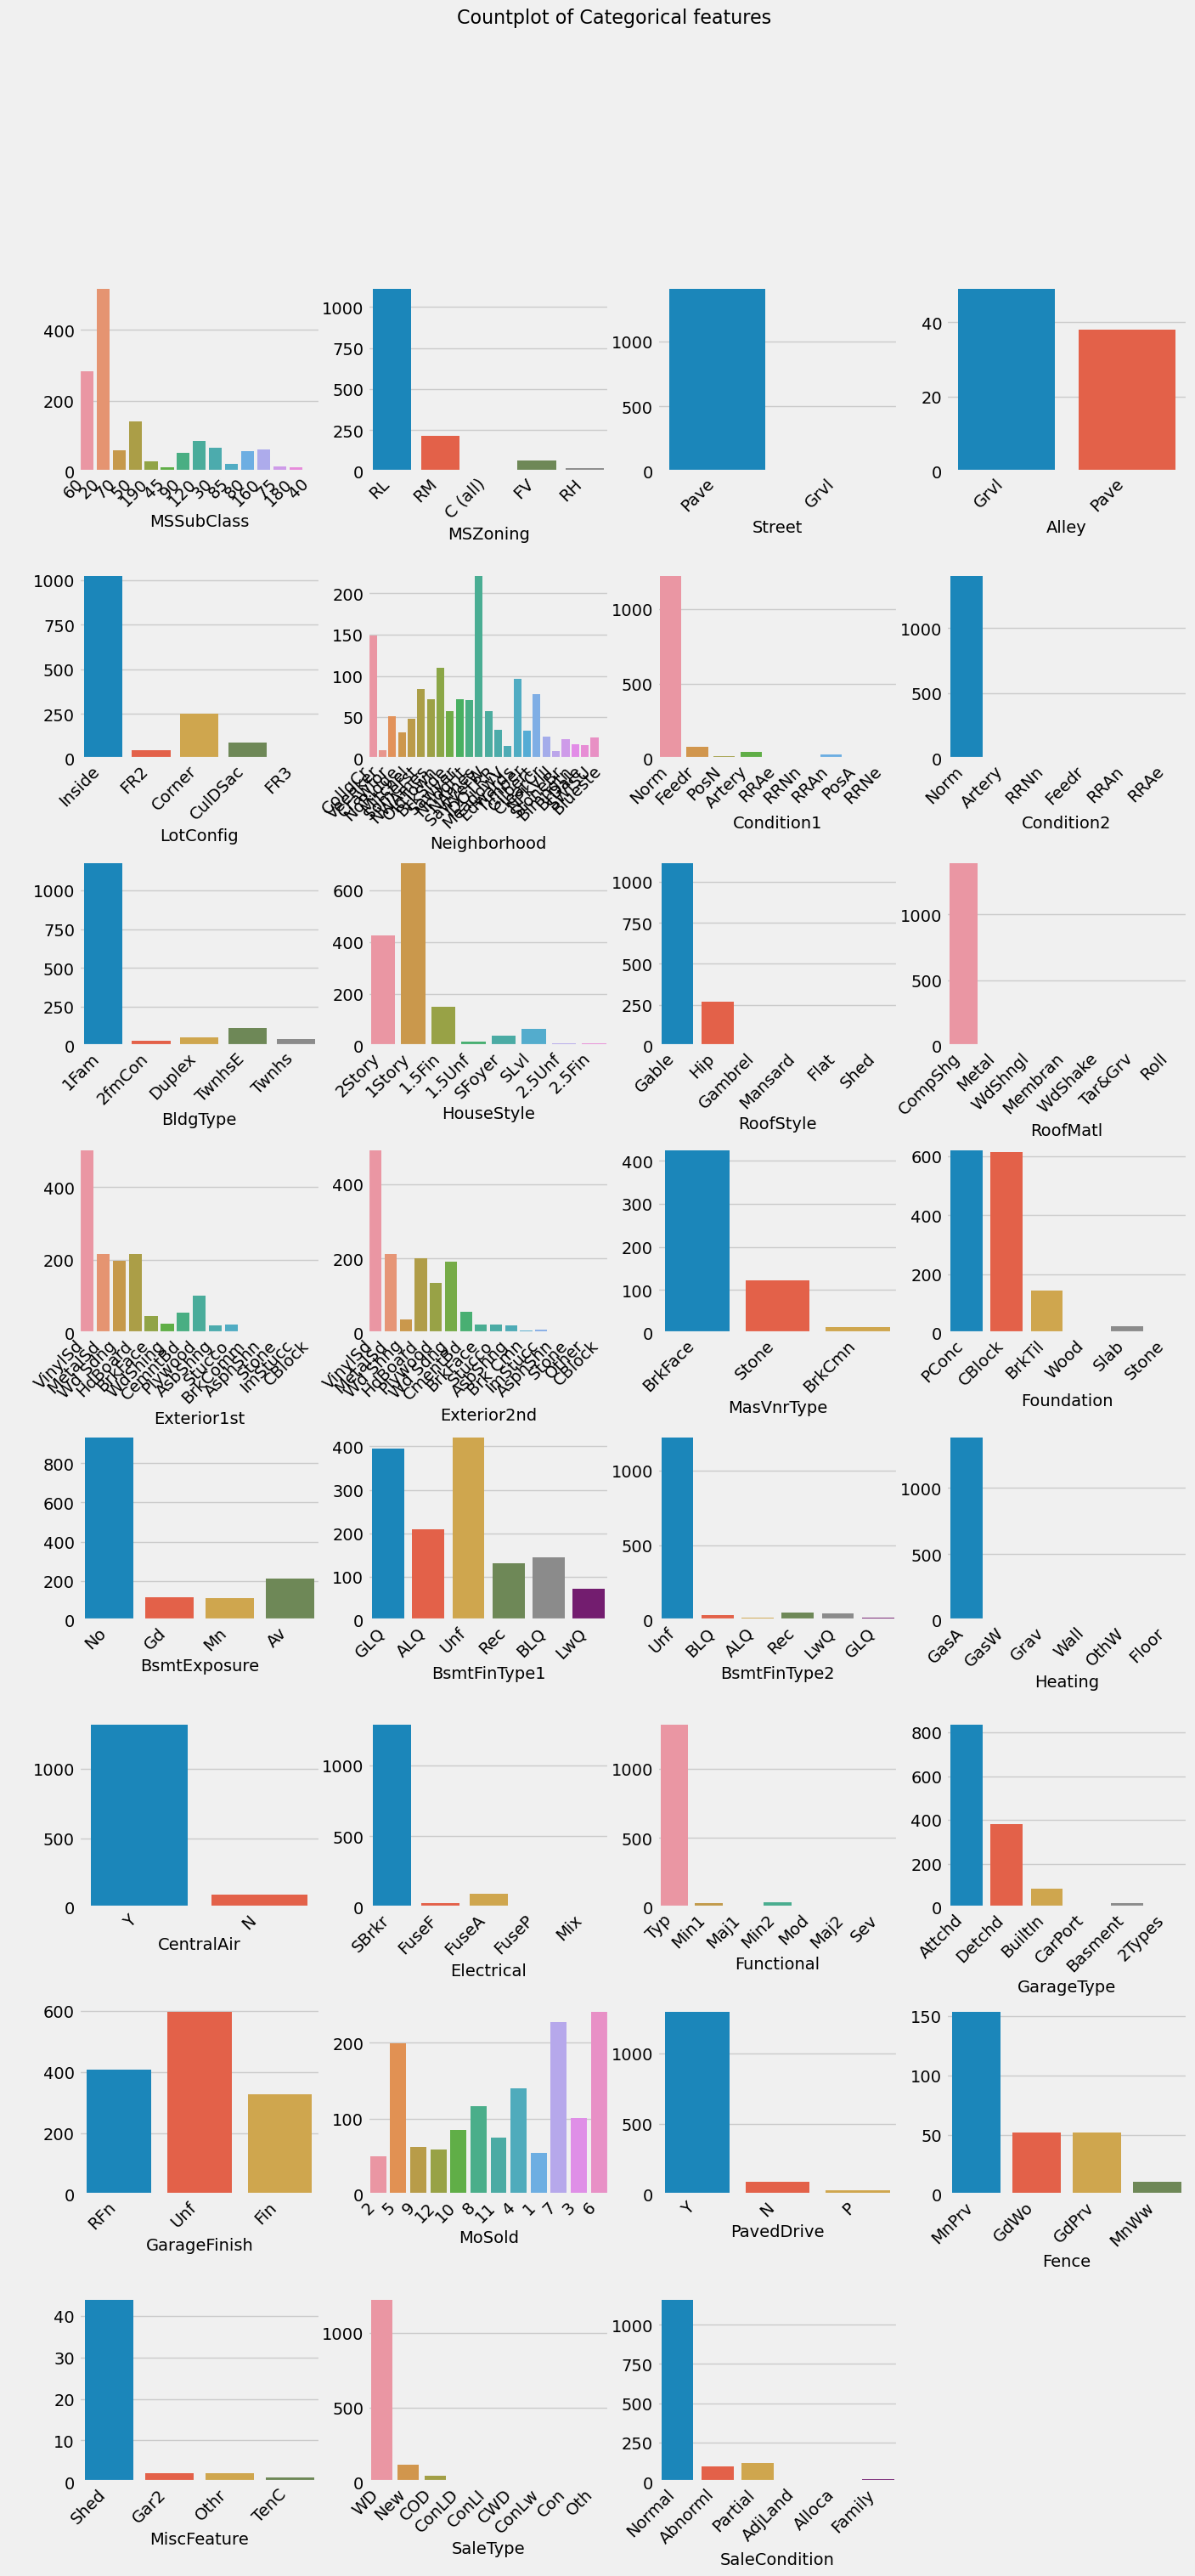

In [25]:
visualise_data(train_data, cat_nom, "countplot")

In [26]:
# dislplay column headers for displaying statistics about the data.
print(f"{'Column':<15} {'Unique Values':<16} {'Variance':<15} {'Proportion':<16}")

# print a horizontal line
print('_' * (shutil.get_terminal_size().columns), '\n')

for column in numeric_columns:
    unique_values = train_data[column].nunique()
    total_values = train_data.shape[0]
    
    proportion = (unique_values/total_values) * 100
    variance = np.var(train_data[column],ddof=1)
    
    print(f"{column:<15}{unique_values:<16}{variance:<15.2f}{proportion:<12.2f}")

Column          Unique Values    Variance        Proportion      
________________________________________________________________________________ 

LotFrontage    105             444.18         7.45        
LotArea        1031            24964307.96    73.12       
MasVnrArea     307             24649.49       21.77       
BsmtFinSF1     610             174693.00      43.26       
BsmtFinSF2     137             23772.05       9.72        
BsmtUnfSF      764             192071.37      54.18       
TotalBsmtSF    696             154480.75      49.36       
1stFlrSF       723             124530.33      51.28       
2ndFlrSF       400             179210.64      28.37       
LowQualFinSF   23              2341.08        1.63        
GrLivArea      824             226193.00      58.44       
GarageArea     423             42763.41       30.00       
WoodDeckSF     253             12538.45       17.94       
OpenPorchSF    191             3700.83        13.55       
EnclosedPorch  115       

In [27]:
single_value_columns = [col for col in train_data.columns if train_data[col].nunique() == 1]
train_data.drop(single_value_columns,axis=1,inplace=True)
print(f"Single value columns:{single_value_columns}")
print("Dropped columns:",single_value_columns)

Single value columns:[]
Dropped columns: []


In [28]:
print("Total number of duplicate row",train_data.duplicated().sum())

Total number of duplicate row 0


In [29]:
print("Total number of duplicate row",test_data.duplicated().sum())

Total number of duplicate row 0


In [30]:
print(f"{'Column':<15} {'Dominant Value':<16} {'Value Count(> 1300)':<15}")

# Print a horizontal line to separate the header from the data.
print('_' * (shutil.get_terminal_size().columns), '\n')

for column in test_data.columns:
    value_count = train_data[column].value_counts()
    
    for case, count in value_count.to_dict().items():
        if count > 1300:
            print(f"{column:<15} {case:<16} {count:<15}")
            break

Column          Dominant Value   Value Count(> 1300)
________________________________________________________________________________ 

Street          Pave             1406           
Utilities       AllPub           1409           
LandSlope       Gtl              1339           
Condition2      Norm             1399           
RoofMatl        CompShg          1391           
Heating         GasA             1381           
CentralAir      Y                1318           
LowQualFinSF    0                1385           
BsmtHalfBath    0                1331           
KitchenAbvGr    1                1342           
Functional      Typ              1313           
3SsnPorch       0                1386           
PoolArea        0                1407           
MiscVal         0                1363           


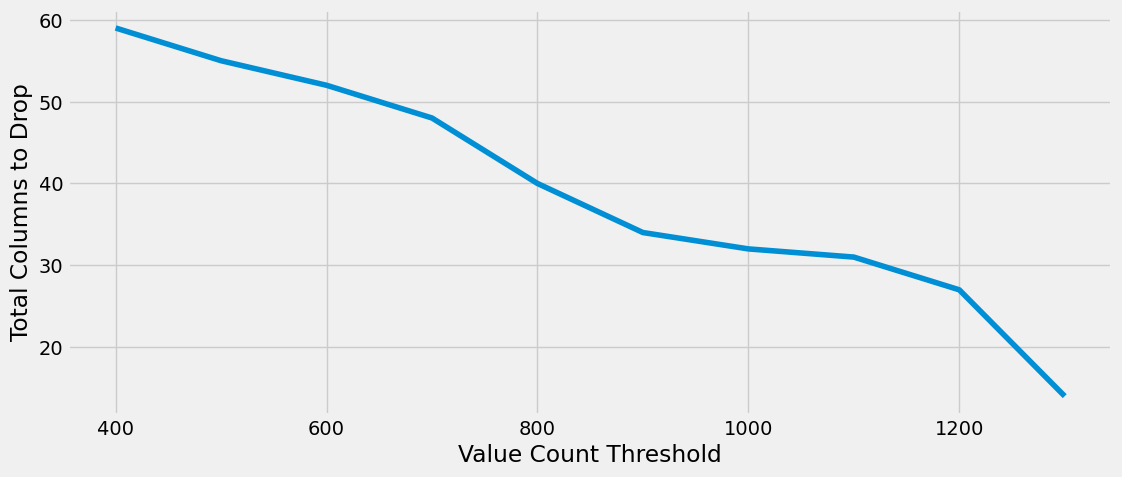

In [31]:
num_cols_to_drop = list()
threshold = list(range(400,1400,100))
for t in threshold:
    total_cols = 0
    for column in train_data.columns:
        value_count = train_data[column].value_counts()
        for case, count in value_count.to_dict().items():
            if count >t:
                total_cols +=1
                break
                
    num_cols_to_drop.append(total_cols)
        
plt.figure(figsize=(12,5))
plt.plot(threshold, num_cols_to_drop)

plt.xlabel("Value Count Threshold")
plt.ylabel("Total Columns to Drop")
plt.show()

In [32]:
#https://www.kaggle.com/code/mibrahimbashir/housing-prices-eda-and-models-building?scriptVersionId=144679795

In [33]:
cols_to_drop = list()

for column in train_data.columns:
    value_count = train_data[column].value_counts()
    for case, count in value_count.to_dict().items():
        if count > 1200:
            cols_to_drop.append(column)
            break
            
print("The columns to be dropped are ")
print(cols_to_drop)
print("Total number of columns to dropped are ", len(cols_to_drop))

The columns to be dropped are 
['Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'RoofMatl', 'ExterCond', 'BsmtCond', 'BsmtFinType2', 'BsmtFinSF2', 'Heating', 'CentralAir', 'Electrical', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SaleType']
Total number of columns to dropped are  27


In [34]:
train_data.drop(cols_to_drop,axis=1,inplace = True)


In [35]:
test_data.drop(cols_to_drop,axis=1,inplace=True)

In [36]:
for col in cols_to_drop:
    if col in cat_nom:
        cat_nom.remove(col)
        categorical_columns.remove(col)
    elif col in cat_ord:
        cat_ord.remove(col)
        categorical_columns.remove(col)
    elif col in num_dis:
        num_dis.remove(col)
        numeric_columns.remove(col)
    elif col in num_con:
        num_con.remove(col)
        numeric_columns.remove(col)
        

Handling Missing values


In [37]:
total = train_data.isnull().sum().sort_values(ascending=False)

percent = ((train_data.isnull().sum()/train_data.shape[0])*100).sort_values(ascending=False)

missing_data = pd.concat([total,percent],axis=1,keys=["Total Missing","Percentage"])

no_missing_data = missing_data[missing_data['Total Missing'] == 0].index
missing_data.drop(no_missing_data,inplace=True)
missing_data.index.name = 'Training Feature'
display(missing_data.style.set_caption("<b>Missing values in train_data</b>"))

,Total Missing,Percentage
Training Feature,,
PoolQC,1407,99.787234
MiscFeature,1361,96.524823
Alley,1323,93.829787
Fence,1142,80.992908
MasVnrType,850,60.283688
FireplaceQu,685,48.581560
LotFrontage,246,17.446809
GarageType,80,5.673759
GarageFinish,80,5.673759


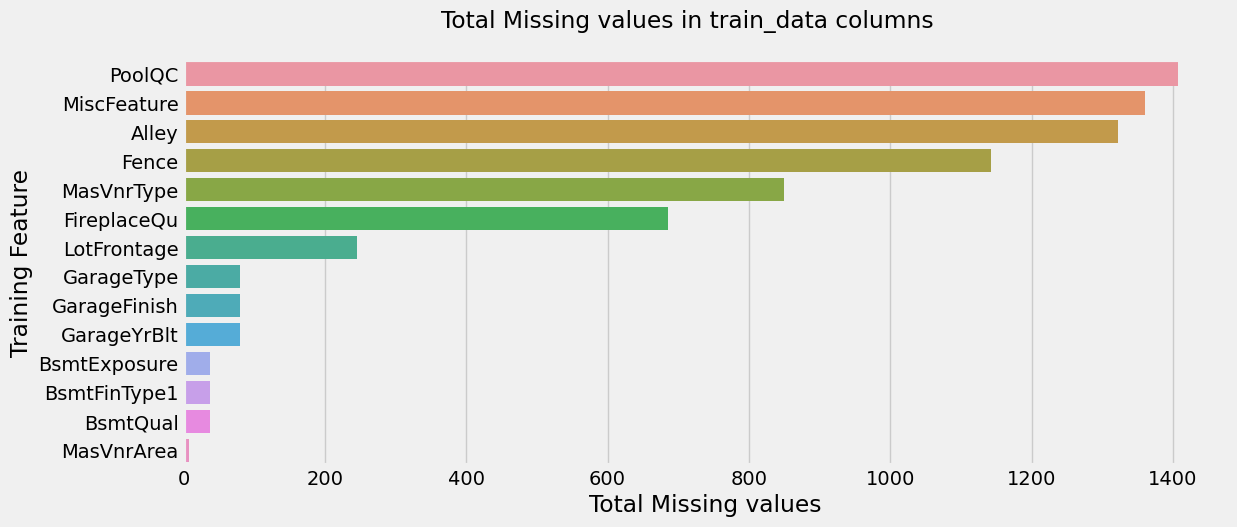

In [38]:
plt.figure(figsize=(12,5))
sns.barplot(x=missing_data['Total Missing'],y=missing_data.index)
plt.xlabel("Total Missing values")
plt.ylabel("Training Feature")
plt.suptitle("Total Missing values in train_data columns")
plt.show()

In [39]:
cols_to_drop = list(missing_data[missing_data['Percentage']>15].index)
print(f"Columns to be dropped due to signficant number of missing value:\n{cols_to_drop}")
print(f"\n Total columns to be dropped:{len(cols_to_drop)}")

Columns to be dropped due to signficant number of missing value:
['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu', 'LotFrontage']

 Total columns to be dropped:7


In [40]:
train_data = train_data.drop(cols_to_drop, axis=1)
test_data = test_data.drop(cols_to_drop,axis=1)

In [41]:
for col in cols_to_drop:
    if col in cat_nom:
        cat_nom.remove(col)
        categorical_columns.remove(col)
    elif col in cat_ord:
        cat_ord.remove(col)
        categorical_columns.remove(col)
    elif col in num_dis:
        num_dis.remove(col)
        numeric_columns.remove(col)
    elif col in num_con:
        num_con.remove(col)
        numeric_columns.remove(col)

In [42]:
missing_data.drop(cols_to_drop, inplace = True)

In [43]:
display(missing_data.style.set_caption("<b>Missing values in train_data</b>"))

,Total Missing,Percentage
Training Feature,,
GarageType,80,5.673759
GarageFinish,80,5.673759
GarageYrBlt,80,5.673759
BsmtExposure,38,2.695035
BsmtFinType1,37,2.624113
BsmtQual,37,2.624113
MasVnrArea,8,0.567376


# Handling Missing value 

In [44]:
missing_data_cols = list(missing_data.index)

for col in missing_data_cols:
    if col in numeric_columns:
        train_data[col] = train_data[col].fillna(train_data[col].mean())
    elif col in categorical_columns:
        train_data[col] = train_data[col].fillna(train_data[col].mode()[0])

In [45]:
print(f"Total null values in train_data after imputing them: ", end="")
print(train_data.isnull().any(axis=1).sum())

Total null values in train_data after imputing them: 0


In [46]:
total = test_data.isnull().sum().sort_values(ascending=False)

# percentage of total null_values in test_data
percent = ((test_data.isnull().sum() / test_data.shape[0]) * 100).sort_values(ascending=False)

# create DataFrame of missing values
missing_data = pd.concat([total, percent], axis=1, keys=['Total Missing', 'Percent'])

# drop columns which had 0 missing values from the DataFrame
no_missing_cols = missing_data[missing_data['Total Missing'] == 0].index
missing_data.drop(no_missing_cols, inplace=True)
missing_data.index.name = 'Feature'

display(missing_data.style.set_caption("<b>Missing values in test_data</b>"))

,Total Missing,Percent
Feature,,
GarageFinish,78,5.346127
GarageYrBlt,78,5.346127
GarageType,76,5.209047
BsmtExposure,44,3.015764
BsmtQual,44,3.015764
BsmtFinType1,42,2.878684
MasVnrArea,15,1.028101
MSZoning,4,0.274160
BsmtFullBath,2,0.137080


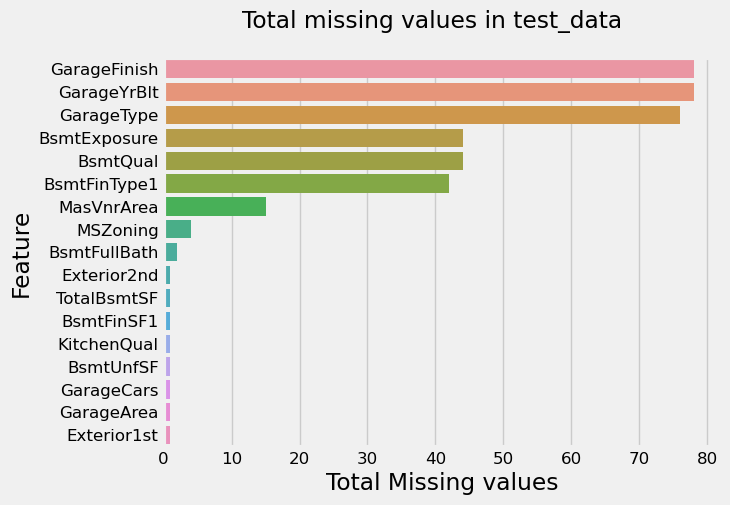

In [47]:
sns.barplot(x=missing_data['Total Missing'], y=missing_data.index)

plt.xlabel("Total Missing values")
plt.ylabel("Feature")
plt.suptitle("Total missing values in test_data")

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


In [48]:
missing_data_cols = list(missing_data.index)

# fill numeric_columns with mean and categorical_columns with mode
for col in missing_data_cols:
    if col in numeric_columns:
        test_data[col] = test_data[col].fillna(test_data[col].mean())
    elif col in categorical_columns:
        test_data[col] = test_data[col].fillna(test_data[col].mode()[0])

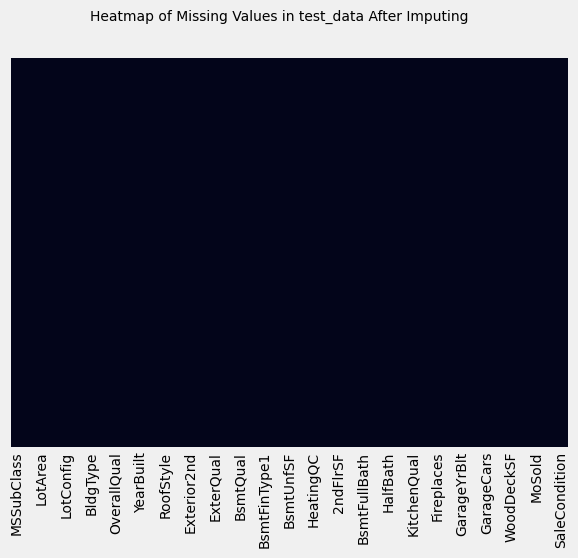

In [49]:
# heatmap to confirm all missing values have been filled in test_data
sns.heatmap(test_data.isnull(), yticklabels=False, cbar=False)

plt.xticks(fontsize=10)
plt.ylabel("")
plt.suptitle("Heatmap of Missing Values in test_data After Imputing", fontsize=10)
plt.show()

In [50]:
print(f"Total null values in test_data after imputing them: ", end="")
print(test_data.isnull().any(axis=1).sum())

Total null values in test_data after imputing them: 0


In [51]:
print(cat_nom)
print(cat_ord)
print(num_dis)
print(num_con)

['MSSubClass', 'MSZoning', 'LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'Foundation', 'BsmtExposure', 'BsmtFinType1', 'GarageType', 'GarageFinish', 'MoSold', 'SaleCondition']
['LotShape', 'OverallQual', 'OverallCond', 'ExterQual', 'BsmtQual', 'HeatingQC', 'KitchenQual']
['YearBuilt', 'YearRemodAdd', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'YrSold']
['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']


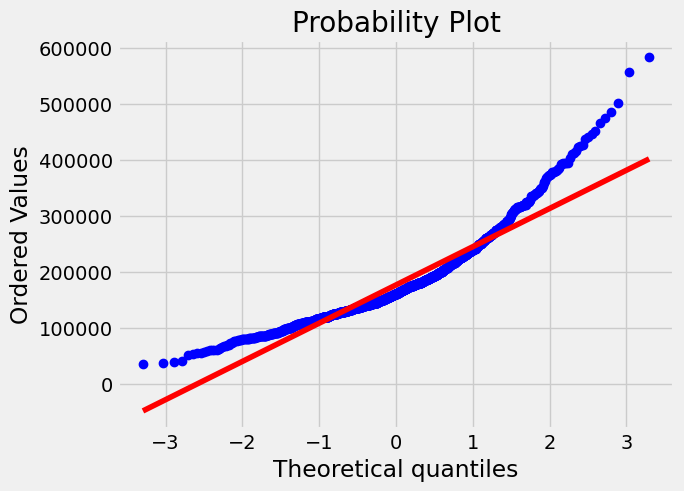

In [52]:
# Assess the normality of SalePrice
stats.probplot(train_data['SalePrice'], plot=plt)
plt.show()

In [53]:
train_data["SalePrice"] = np.log1p(train_data["SalePrice"])

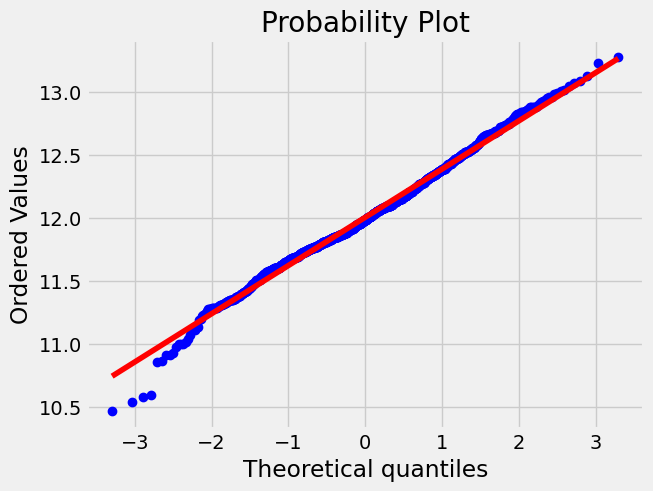

In [54]:
stats.probplot(train_data['SalePrice'],plot=plt)
plt.show()

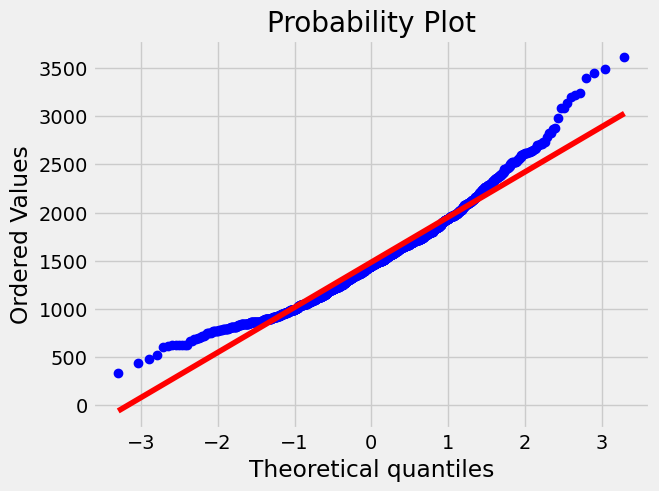

In [55]:
stats.probplot(train_data['GrLivArea'],plot=plt)
plt.show()

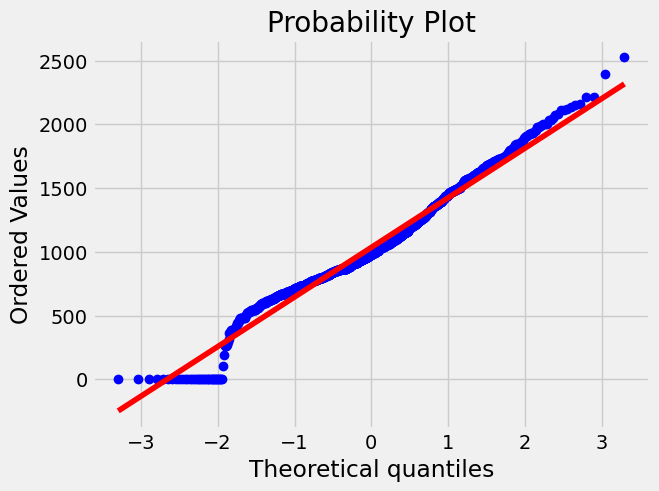

In [56]:
stats.probplot(train_data['TotalBsmtSF'],plot=plt)
plt.show()

In [58]:
train_data["GrLivArea"] = np.log1p(train_data["GrLivArea"])
train_data['TotalBsmtSF'] = np.log1p(train_data["TotalBsmtSF"])

test_data['GrLivArea'] = np.log1p(test_data["GrLivArea"])
test_data['TotalBsmtSF'] = np.log1p(test_data["TotalBsmtSF"])

In [59]:
from scipy.stats import skew
skewed_features = train_data[numeric_columns].apply(lambda x:skew (x))

In [60]:
skewed_features = skewed_features[skewed_features > 0.5]
skewed_features = skewed_features.index
skewed_features

Index(['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', '1stFlrSF',
       '2ndFlrSF', 'WoodDeckSF', 'OpenPorchSF', 'BsmtFullBath', 'HalfBath',
       'TotRmsAbvGrd', 'Fireplaces'],
      dtype='object')

In [61]:
train_data[skewed_features] = np.log1p(train_data[skewed_features])
test_data[skewed_features] = np.log1p(test_data[skewed_features])


In [62]:
combined_data = pd.concat([train_data,test_data],axis=0)
print(f"Combined data shape:{combined_data.shape}")

Combined data shape:(2869, 46)


In [64]:
dummy_data = pd.get_dummies(combined_data[cat_nom],drop_first=True)
print(dummy_data.shape)

(2869, 128)


In [65]:
combined_data = pd.concat([combined_data,dummy_data],axis=1)
print(combined_data.shape)

(2869, 174)


In [66]:
print(combined_data)

     MSSubClass MSZoning   LotArea LotShape LotConfig Neighborhood BldgType  \
Id                                                                            
1            60       RL  9.042040      Reg    Inside      CollgCr     1Fam   
2            20       RL  9.169623      Reg       FR2      Veenker     1Fam   
3            60       RL  9.328212      IR1    Inside      CollgCr     1Fam   
4            70       RL  9.164401      IR1    Corner      Crawfor     1Fam   
5            60       RL  9.565284      IR1       FR2      NoRidge     1Fam   
...         ...      ...       ...      ...       ...          ...      ...   
2915        160       RM  7.568896      Reg    Inside      MeadowV    Twnhs   
2916        160       RM  7.546974      Reg    Inside      MeadowV   TwnhsE   
2917         20       RL  9.903538      Reg    Inside      Mitchel     1Fam   
2918         85       RL  9.253591      Reg    Inside      Mitchel     1Fam   
2919         60       RL  9.172431      Reg    Insid

In [67]:
combined_data.drop(cat_nom,axis=1,inplace=True)
print(combined_data.shape)

(2869, 158)


In [68]:
train_data = combined_data.loc[train_data.index, :]
test_data=combined_data.loc[test_data.index, :]

test_data.drop('SalePrice',axis=1,inplace=True)

print(f"Train data shape: {train_data.shape}")
print(f"Test data shape: {test_data.shape}")

Train data shape: (1410, 158)
Test data shape: (1459, 157)
